In [1]:
import os
import re
import numpy as np
import cv2
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.5.1'

In [3]:
col_frames = os.listdir('frames/')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

col_images = []
for i in tqdm_notebook(col_frames):
    img = cv2.imread('frames/' + i)
    col_images.append(img)


  0%|          | 0/1108 [00:00<?, ?it/s]

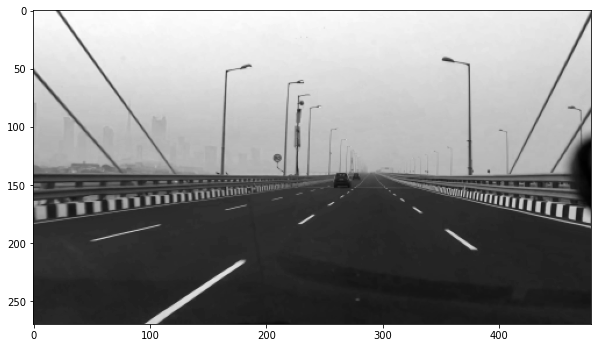

In [4]:
idx = 457

plt.figure(figsize=(10, 10))
plt.imshow(col_images[idx][:,:,0], cmap='gray')
plt.show()

In [5]:
col_images[idx][:,:,0].shape


(270, 480)

In [6]:
stencil = np.zeros_like(col_images[idx][:,:,0])
print(stencil.shape)
polygon = np.array([[50, 270], [220, 160], [360, 160], [480, 270]])

cv2.fillConvexPoly(stencil, polygon, 1)


(270, 480)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

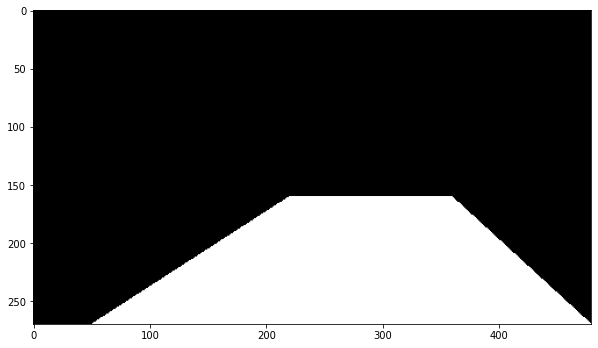

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

(270, 480)


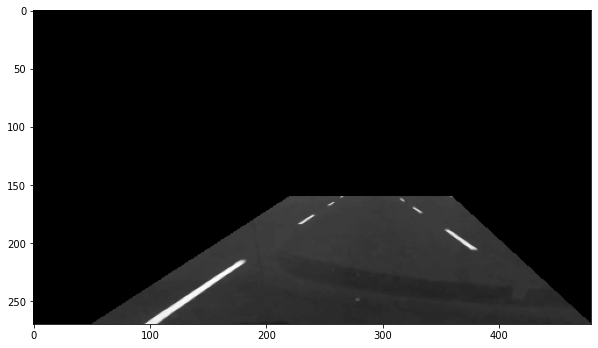

In [9]:
# apply polygon as a mask on the frame
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)
print(img.shape)
# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

(270, 480)


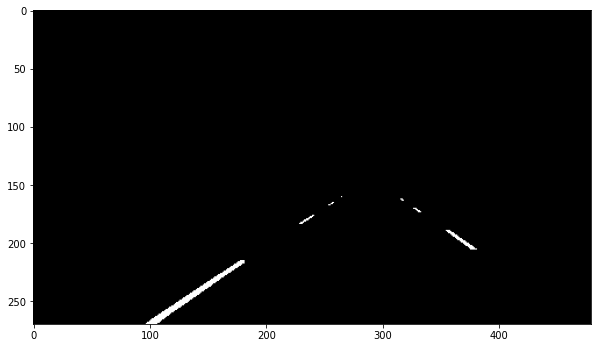

In [10]:
# apply image thresholding
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)
print(thresh.shape)
# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

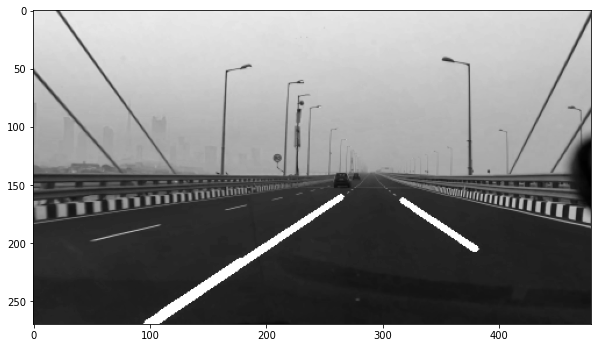

In [9]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images[idx][:,:,0].copy()

# draw Hough lines
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

In [10]:
cnt = 0

for img in tqdm_notebook(col_images):
  
  # apply frame mask
  masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)
  
  # apply image thresholding
  ret, thresh = cv2.threshold(masked, 130, 145, cv2.THRESH_BINARY)

  # apply Hough Line Transformation
  lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
  dmy = img.copy()
  
  # Plot detected lines
  try:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
  
    cv2.imwrite('detected/'+str(cnt)+'.png',dmy)
  
  except TypeError: 
    cv2.imwrite('detected/'+str(cnt)+'.png',img)

  cnt+= 1

  0%|          | 0/1108 [00:00<?, ?it/s]

In [11]:
# input frames path
pathIn= 'detected/'

# output path to save the video
pathOut = 'roads_v2.mp4'

# specify frames per second
fps = 30.0

In [12]:
from os.path import isfile, join

# get file names of the frames
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [13]:
frame_list = []
size = ()
for i in tqdm_notebook(range(len(files))):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_list.append(img)

  0%|          | 0/1108 [00:00<?, ?it/s]

In [15]:
out = cv2.VideoWriter('video.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_list)):
    # writing to a image array
    out.write(frame_list[i])

out.release()